# Lecture 9 -- Data Visualization and Binning

In [3]:
import pandas as pd
import numpy as np
import matplotlib as plt
from matplotlib import pyplot

In [4]:
df=pd.read_csv("auto.csv")

In [5]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [6]:
df

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
201,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
202,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [7]:
df.columns=headers

(array([1., 0., 0., 0., 0., 0., 0., 1., 0., 1.]),
 array([  2. ,  13.2,  24.4,  35.6,  46.8,  58. ,  69.2,  80.4,  91.6,
        102.8, 114. ]),
 <BarContainer object of 10 artists>)

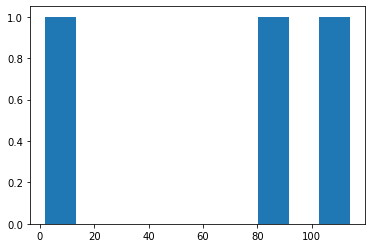

In [8]:
plt.pyplot.hist(df["num-of-doors"].value_counts())

(array([1., 0., 0., 0., 0., 0., 0., 1., 0., 1.]),
 array([  2. ,  13.2,  24.4,  35.6,  46.8,  58. ,  69.2,  80.4,  91.6,
        102.8, 114. ]),
 <BarContainer object of 10 artists>)

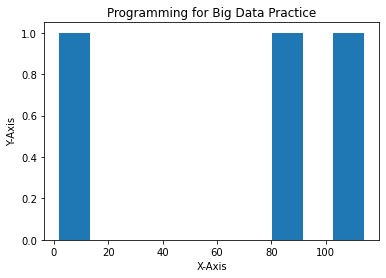

In [9]:
plt.pyplot.title("Programming for Big Data Practice")
plt.pyplot.xlabel("X-Axis")
plt.pyplot.ylabel("Y-Axis")
plt.pyplot.hist(df["num-of-doors"].value_counts())

In [10]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [11]:
df["horsepower"].head(15)

0     111
1     154
2     102
3     115
4     110
5     110
6     110
7     140
8     160
9     101
10    101
11    121
12    121
13    121
14    182
Name: horsepower, dtype: object

(array([32., 11., 11.,  2.,  1.,  2.,  0.,  0.,  0.,  1.]),
 array([ 1. ,  2.8,  4.6,  6.4,  8.2, 10. , 11.8, 13.6, 15.4, 17.2, 19. ]),
 <BarContainer object of 10 artists>)

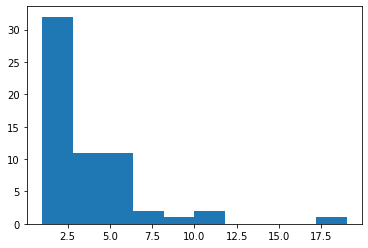

In [12]:
plt.pyplot.hist(df['horsepower'].value_counts())

In [13]:
df['horsepower'].replace('?',np.nan,inplace=True)

In [14]:
m=df['horsepower'].astype('float').mean()

In [15]:
df['horsepower'].replace(np.nan,m,inplace=True)

In [16]:
df['horsepower'] = df['horsepower'].astype('int')

In [17]:
b=np.linspace(df['horsepower'].min(),df['horsepower'].max(),4)

In [18]:
lbl=['LOW','Average','High']

In [19]:
b

array([ 48., 128., 208., 288.])

In [20]:
df['horsepower-bin']=pd.cut(df['horsepower'],b,labels=lbl,include_lowest=True)

In [21]:
df[['horsepower','horsepower-bin']].head(20)

,horsepower,horsepower-bin
0,111,LOW
1,154,Average
2,102,LOW
3,115,LOW
4,110,LOW
5,110,LOW
6,110,LOW
7,140,Average
8,160,Average
9,101,LOW


(<module 'matplotlib' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\__init__.py'>,
 (array([162.,  42.]),
  array([0., 1., 2.]),
  <BarContainer object of 2 artists>))

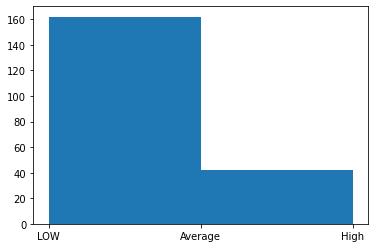

In [22]:
plt,pyplot.hist(df['horsepower-bin'],lbl)

(<module 'matplotlib' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\__init__.py'>,
 (array([162.,  42.]),
  array([0., 1., 2.]),
  <BarContainer object of 2 artists>))

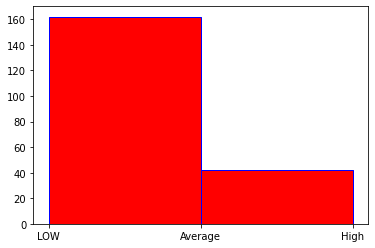

In [31]:
plt,pyplot.hist(df['horsepower-bin'],lbl,color='red',ec='blue')

# Lecture 10 

In [32]:
df['horsepower-bin'].head(30)

0         LOW
1     Average
2         LOW
3         LOW
4         LOW
5         LOW
6         LOW
7     Average
8     Average
9         LOW
10        LOW
11        LOW
12        LOW
13        LOW
14    Average
15    Average
16    Average
17        LOW
18        LOW
19        LOW
20        LOW
21        LOW
22        LOW
23        LOW
24        LOW
25        LOW
26        LOW
27        LOW
28    Average
29        LOW
Name: horsepower-bin, dtype: category
Categories (3, object): ['LOW' < 'Average' < 'High']

In [33]:
df['horsepower-bin'].value_counts()

LOW        162
Average     40
High         2
Name: horsepower-bin, dtype: int64

([<matplotlib.patches.Wedge at 0x2681e8ec880>,
 [Text(-0.877818913499439, 0.6628981483626764, ''),
  Text(0.8569885629806697, -0.6896162722270458, ''),
  Text(1.0994782886744314, -0.03387466211703791, '')])

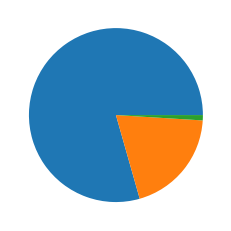

In [35]:
plt.pyplot.pie(df['horsepower-bin'].value_counts())

([<matplotlib.patches.Wedge at 0x2681e93b910>,
 [Text(-0.877818913499439, 0.6628981483626764, ''),
  Text(0.9348966141607307, -0.7523086606113227, ''),
  Text(1.0994782886744314, -0.03387466211703791, '')])

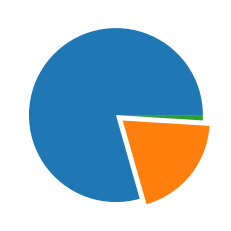

In [36]:
plt.pyplot.pie(df['horsepower-bin'].value_counts(),explode=[0,0.1,0])

([<matplotlib.patches.Wedge at 0x2681e97ca30>,
 [Text(-0.877818913499439, 0.6628981483626764, ''),
  Text(0.9348966141607307, -0.7523086606113227, ''),
  Text(1.0994782886744314, -0.03387466211703791, '')])

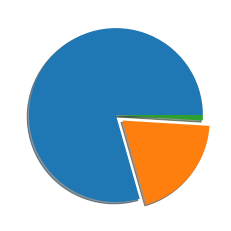

In [38]:
plt.pyplot.pie(df['horsepower-bin'].value_counts(),shadow=True,explode=[0,0.1,0])

([<matplotlib.patches.Wedge at 0x2681d8043d0>,
 [Text(-0.877818913499439, 0.6628981483626764, 'LOW'),
  Text(0.9348966141607307, -0.7523086606113227, 'AVG'),
  Text(1.0994782886744314, -0.03387466211703791, 'HIGH')])

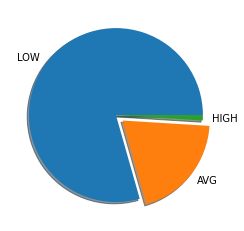

In [39]:
plt.pyplot.pie(df['horsepower-bin'].value_counts(),shadow=True,explode=[0,0.1,0],labels=['LOW','AVG','HIGH'])

([<matplotlib.patches.Wedge at 0x2681d6c7610>,
 [Text(-0.877818913499439, 0.6628981483626764, 'LOW'),
  Text(0.9348966141607307, -0.7523086606113227, 'AVG'),
  Text(1.0994782886744314, -0.03387466211703791, 'HIGH')],
 [Text(-0.4788103164542393, 0.3615808081978234, '79.4%'),
  Text(0.5453563582604262, -0.4388467186899382, '19.6%'),
  Text(0.5997154301860534, -0.018477088427475218, '1.0%')])

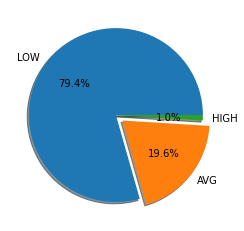

In [41]:
plt.pyplot.pie(df['horsepower-bin'].value_counts(),shadow=True,explode=[0,0.1,0],labels=['LOW','AVG','HIGH'],autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x2681eac0be0>,
 [Text(-0.6628981483626759, -0.8778189134994392, 'LOW'),
  Text(0.7523086606113228, 0.9348966141607304, 'AVG'),
  Text(0.03387466211703797, 1.0994782886744314, 'HIGH')],
 [Text(-0.3615808081978232, -0.4788103164542395, '79.4%'),
  Text(0.4388467186899383, 0.545356358260426, '19.6%'),
  Text(0.018477088427475256, 0.5997154301860534, '1.0%')])

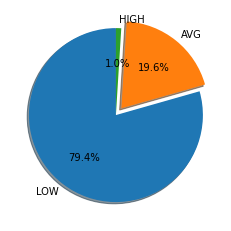

In [48]:
plt.pyplot.pie(df['horsepower-bin'].value_counts(),shadow=True,explode=[0,0.1,0],labels=['LOW','AVG','HIGH'],autopct='%1.1f%%',startangle=90)

In [49]:
import seaborn as sns

# CO-RELATION
1 : Positive Correlation
2 : Negative Correlation
3 : Zero Correlation (Neutrol)

In [50]:
df.corr()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,horsepower,city-mpg,highway-mpg
symboling,1.000000,-0.525095,-0.356792,-0.227799,-0.533078,-0.229281,-0.107229,-0.177413,0.070449,-0.030557,0.039598
wheel-base,-0.525095,1.000000,0.877612,0.795115,0.582603,0.781763,0.573989,0.249199,0.355932,-0.479633,-0.552897
length,-0.356792,0.877612,1.000000,0.841199,0.491969,0.878090,0.683830,0.157913,0.555053,-0.673251,-0.706635
width,-0.227799,0.795115,0.841199,1.000000,0.274075,0.868493,0.737042,0.180287,0.644059,-0.647177,-0.681169
height,-0.533078,0.582603,0.491969,0.274075,1.000000,0.298429,0.068577,0.261036,-0.109529,-0.055659,-0.113995
curb-weight,-0.229281,0.781763,0.878090,0.868493,0.298429,1.000000,0.850611,0.151372,0.751039,-0.758238,-0.798088
engine-size,-0.107229,0.573989,0.683830,0.737042,0.068577,0.850611,1.000000,0.029083,0.810711,-0.654101,-0.677775
compression-ratio,-0.177413,0.249199,0.157913,0.180287,0.261036,0.151372,0.029083,1.000000,-0.205531,0.324186,0.264677
horsepower,0.070449,0.355932,0.555053,0.644059,-0.109529,0.751039,0.810711,-0.205531,1.000000,-0.803479,-0.771066
city-mpg,-0.030557,-0.479633,-0.673251,-0.647177,-0.055659,-0.758238,-0.654101,0.324186,-0.803479,1.000000,0.971311


In [52]:
#[-1,1]

<AxesSubplot:xlabel='curb-weight', ylabel='length'>

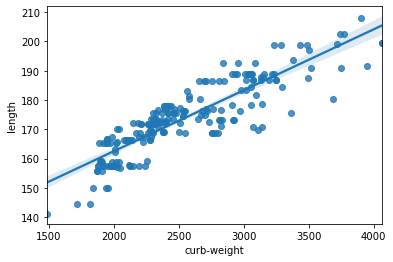

In [53]:
sns.regplot(data=df,x=df['curb-weight'],y=df['length'])

<AxesSubplot:xlabel='highway-mpg', ylabel='length'>

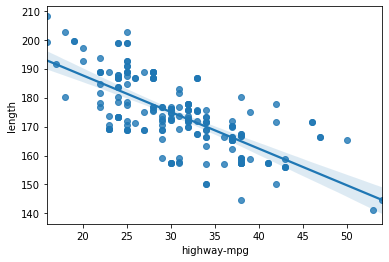

In [54]:
sns.regplot(data=df,x=df['highway-mpg'],y=df['length'])

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

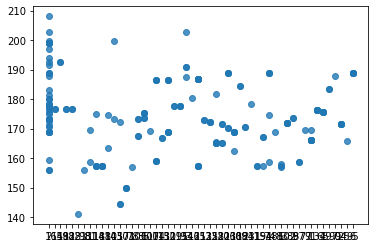

In [55]:
sns.regplot(data=df,x=df['normalized-losses'],y=df['length'])

<AxesSubplot:>

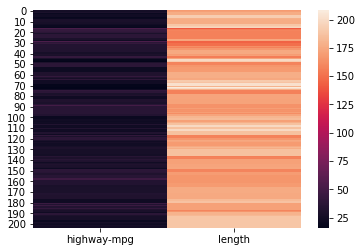

In [61]:
sns.heatmap(df[['highway-mpg','length']])

<AxesSubplot:>

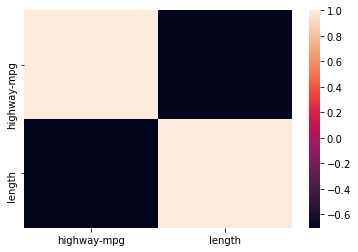

In [62]:
sns.heatmap(df[['highway-mpg','length']].corr())

<AxesSubplot:>

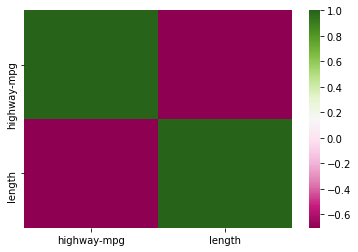

In [66]:
sns.heatmap(df[['highway-mpg','length']].corr(),cmap='PiYG')

<AxesSubplot:>

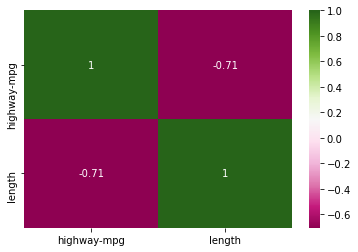

In [67]:
sns.heatmap(df[['highway-mpg','length']].corr(),cmap='PiYG',annot=True)